# BTC predection (LSTM) Real time 


**predict up to 7 minutes in the futures**

In [ ]:
pip install yfinance

### Liberary

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf


import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

###  Dataset

In [ ]:
#testing on finance of yahoo

In [ ]:

# Get the data
data = yf.download(tickers='BTC-USD', period = '5d', interval = '1m')

dd = data
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-09-09 00:00:00+01:00,46604.746094,46604.746094,46604.746094,46604.746094,46604.746094,0
2021-09-09 00:01:00+01:00,46597.089844,46597.089844,46597.089844,46597.089844,46597.089844,0
2021-09-09 00:02:00+01:00,46600.867188,46600.867188,46600.867188,46600.867188,46600.867188,421888
2021-09-09 00:03:00+01:00,46609.292969,46609.292969,46609.292969,46609.292969,46609.292969,2629632
2021-09-09 00:04:00+01:00,46669.906250,46669.906250,46669.906250,46669.906250,46669.906250,4055040
...,...,...,...,...,...,...
2021-09-13 22:02:00+01:00,45460.640625,45460.640625,45460.640625,45460.640625,45460.640625,35893248
2021-09-13 22:03:00+01:00,45381.246094,45381.246094,45381.246094,45381.246094,45381.246094,0
2021-09-13 22:04:00+01:00,45359.972656,45359.972656,45359.972656,45359.972656,45359.972656,49299456


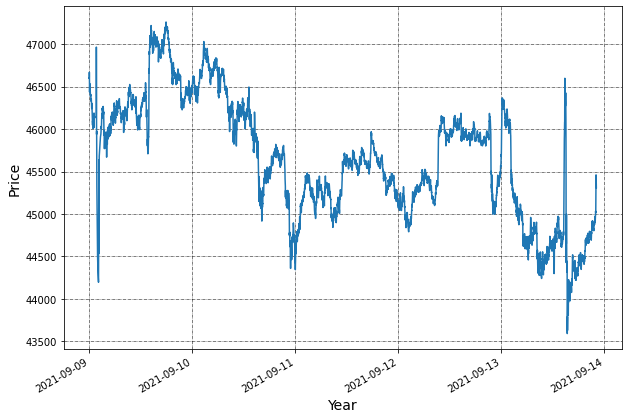

In [ ]:
# Plot the adjusted close price
data['Close'].plot(figsize=(10, 7))

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [ ]:
df = data['Close'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(7025, 1)


array([[46604.74609375],
       [46597.08984375],
       [46600.8671875 ],
       [46609.29296875],
       [46669.90625   ]])

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-5:])
print(dataset_train.shape)
print(dataset_test.shape)

(5620, 1)
(1410, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.78562045],
       [0.78312298],
       [0.78435515],
       [0.78710364],
       [0.80687568]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.26875681],
       [0.26930727],
       [0.28808288],
       [0.30393415],
       [0.30955855]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(20, df.shape[0]):
        x.append(df[i-20:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.78562045, 0.78312298, 0.78435515, 0.78710364, 0.80687568,
        0.79115438, 0.74587249, 0.73065068, 0.75097318, 0.75248186,
        0.76324518, 0.75524691, 0.74072974, 0.73072204, 0.73023274,
        0.73016138, 0.73604699, 0.73029772, 0.72485426, 0.71909352]])

In [ ]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.26875681, 0.26930727, 0.28808288, 0.30393415, 0.30955855,
        0.30453176, 0.29252862, 0.29477889, 0.29332883, 0.29461069,
        0.29509999, 0.29571926, 0.29628119, 0.28986805, 0.29064405,
        0.30464134, 0.30990768, 0.32279385, 0.32251607, 0.33437777]])

In [ ]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Building Model

for model pramter we can use grid search to get best prameter ,but also as first step we can work with this prameter.

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
#final layer dense
model.add(Dense(units=1))

In [ ]:

model.compile(loss='mean_squared_error', optimizer='adam')

we can add early stop and saving best only here also.

In [ ]:
model.fit(x_train, y_train, epochs=400, batch_size=32)
    
    
model.save('btc.h5')

    # training 

Epoch 1/20
175/175 [==============================] - 16s 65ms/step - loss: 0.0111
Epoch 2/20
175/175 [==============================] - 11s 66ms/step - loss: 0.0036
Epoch 3/20
175/175 [==============================] - 11s 65ms/step - loss: 0.0034
Epoch 4/20
175/175 [==============================] - 11s 65ms/step - loss: 0.0029
Epoch 5/20
175/175 [==============================] - 12s 66ms/step - loss: 0.0026
Epoch 6/20
175/175 [==============================] - 11s 65ms/step - loss: 0.0022
Epoch 7/20
175/175 [==============================] - 11s 65ms/step - loss: 0.0021
Epoch 8/20
175/175 [==============================] - 11s 65ms/step - loss: 0.0018
Epoch 9/20
175/175 [==============================] - 11s 65ms/step - loss: 0.0016
Epoch 10/20
175/175 [==============================] - 11s 65ms/step - loss: 0.0015
Epoch 11/20
175/175 [==============================] - 12s 66ms/step - loss: 0.0015
Epoch 12/20
175/175 [==============================] - 11s 65ms/step - loss: 0.0014
E

#Real time price

In [ ]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

# Get Bitcoin data
data = yf.download(tickers='BTC-USD', period = '22h', interval = '15m')

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Bitcoin live share price evolution',
    yaxis_title='Bitcoin Price (kUS Dollars)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=6, label="6h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

[*********************100%***********************]  1 of 1 completed


# 7 minutes in the future

[*********************100%***********************]  1 of 1 completed
<class 'numpy.ndarray'>
[45162.0, 49034.555, 49929.152, 50553.625, 50790.984, 50947.27, 51025.05]


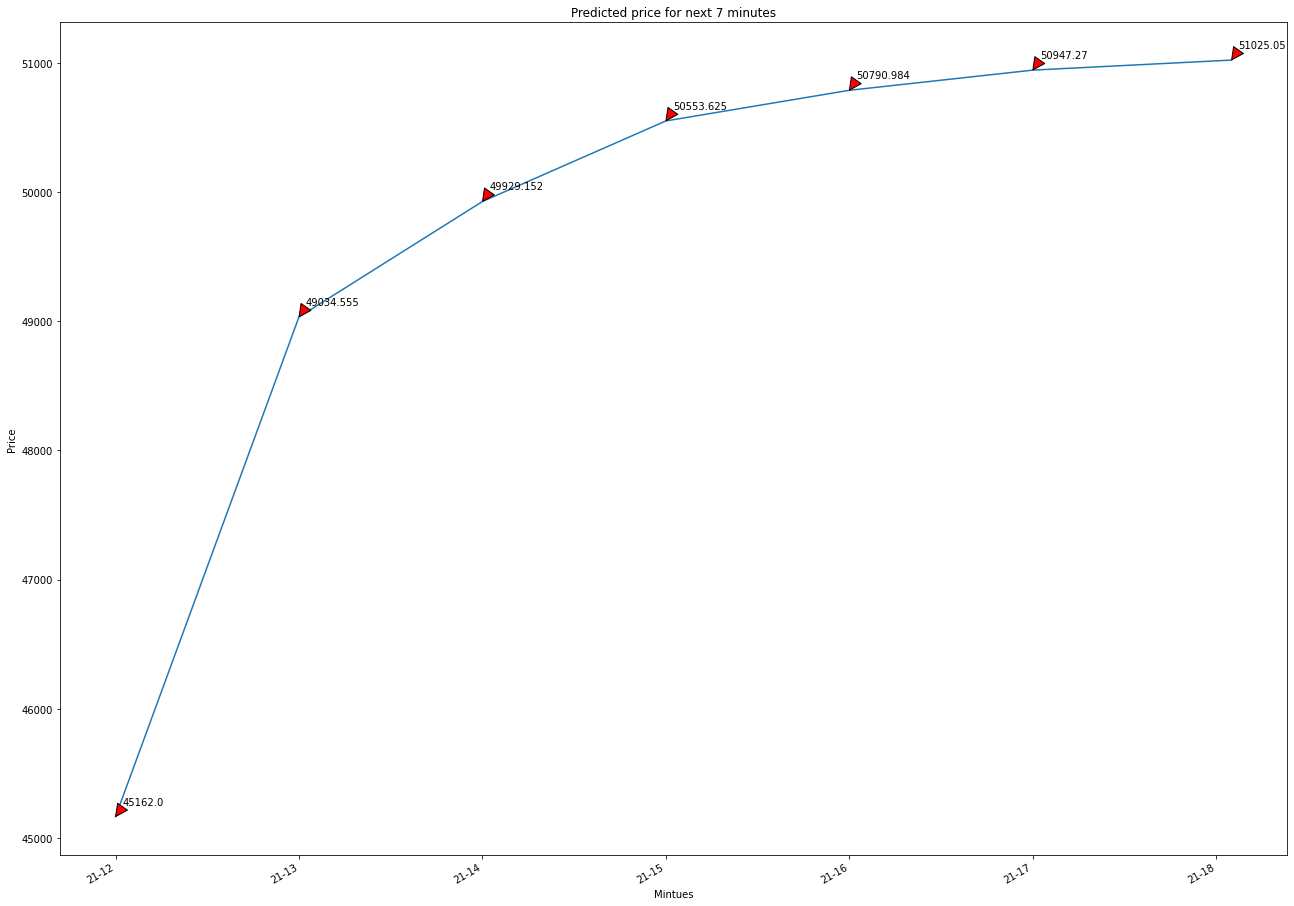

In [ ]:
# TEst area for further updates with api 


# Get the data
data = yf.download(tickers='BTC-USD', period = '1d', interval = '1m')

dd = data
df = data['Close'].values
df = df.reshape(-1, 1)
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-5:])
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
def create_dataset(df):
    x = []
    y = []
    for i in range(20, df.shape[0]):
        x.append(df[i-20:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


############
# predict close price of next 7m

x = x_test[-1]
print(type(x))

num_timesteps = 7
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    #print(data)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

############


# plot up next to next 7 minutes

date_test =pd.to_datetime(dd.reset_index()['Datetime'][-len(preds):])+ datetime.timedelta(minutes=7)

fig, ax = plt.subplots(figsize=(22,17))
ax.plot(date_test,preds)
# Define the date format

date_form = DateFormatter("%H-%M")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MinuteLocator())


fig.autofmt_xdate()


x= date_test
y= preds
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j), xytext=(7,12), textcoords='offset points', arrowprops=dict(facecolor='red', shrink=0.02))

# Set title and labels for axes
ax.set(xlabel="Mintues",
       ylabel="Price",
       title="Predicted price for next 7 minutes",
       )


plt.show()